In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_dir = Path('data')
delta_frequency_path = Path.joinpath(data_dir, Path('delta_frequency_under_1b.csv'))

In [3]:
df = pd.read_csv(delta_frequency_path)
df.head(4)

,delta,delta_log2,frequency,density,cumulative_density
0,2,1.000000,2047829,0.040274,0.040274
1,1/2,-1.000000,2046288,0.040244,0.080518
2,3/2,0.584963,1460663,0.028726,0.109244
3,2/3,-0.584963,1460572,0.028725,0.137968


In [5]:
total_deltas_quantity = len(df.index)
data = {'Primes Coverage (%)': [25, 50, 75, 90, 95, 99, 99.9, 99.99, 99.999, 99.9999, 99.99999],
        'Required Deltas Quantity': [],
        'Required Deltas (%)': []}
for p in data['Primes Coverage (%)']:
    quantity = len(df[df['cumulative_density']<(p/100)].index)
    data['Required Deltas Quantity'].append(quantity)
    data['Required Deltas (%)'].append((quantity/total_deltas_quantity)*100)

In [6]:
data_df = pd.DataFrame(data)
data_df

,Primes Coverage (%),Required Deltas Quantity,Required Deltas (%)
0,25.00000,8,0.239664
1,50.00000,30,0.898742
2,75.00000,89,2.666267
3,90.00000,206,6.171360
4,95.00000,317,9.496705
5,99.00000,649,19.442780
6,99.90000,1269,38.016777
7,99.99000,2053,61.503895
8,99.99900,2861,85.710006
9,99.99990,3287,98.472139


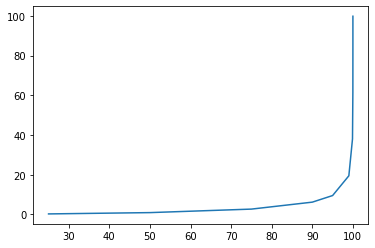

In [7]:
plt.plot(data_df['Primes Coverage (%)'], data_df['Required Deltas (%)'])